In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data=pd.read_csv(mouse_drug_data_to_load)
tumor_data=pd.read_csv(clinical_trial_data_to_load )

# Combine the data into a single dataset
combined_data=pd.merge(drug_data,tumor_data,on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# mean_Tumor_byDrug=combined_data.groupby(["Drug"]).agg({"Tumor Volume (mm3)":"mean"})
# mean_Tumor_byTimepoint=combined_data.groupby(["Timepoint"]).agg({"Tumor Volume (mm3)":"mean"})
# Convert to DataFrame
mean_data=combined_data.groupby(["Drug","Timepoint"]).mean()
del mean_data["Metastatic Sites"]

mean_data.head()
# Preview DataFrame
# mean=pd.DataFrame({"Average Tumor Volume by Grug":[mean_Tumor_byDrug],"Average Tumor Volume by Timepoint":[mean_Tumor_byTimepoint]})
# mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# SE_Tumor_byDrug=combined_data.groupby(["Drug"]).agg({"Tumor Volume (mm3)":"sem"})
# SE_Tumor_byTimepoint=combined_data.groupby(["Timepoint"]).agg({"Tumor Volume (mm3)":"sem"})
# Convert to DataFrame
SE_data=combined_data.groupby(["Drug","Timepoint"]).sem()
del SE_data["Metastatic Sites"]
del SE_data["Mouse ID"]
# Preview DataFrame
SE_data.columns=["Standard erro"]
SE_data.head()



Standard erro
Drug      Timepoint               
Capomulin 0               0.000000
          5               0.448593
          10              0.702684
          15              0.838617
          20              0.909731

In [4]:


SE_volume=SE_data.squeeze().unstack(level=0)
SE_volume


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [5]:
mean_volume=mean_data.squeeze().unstack(level=0)
mean_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


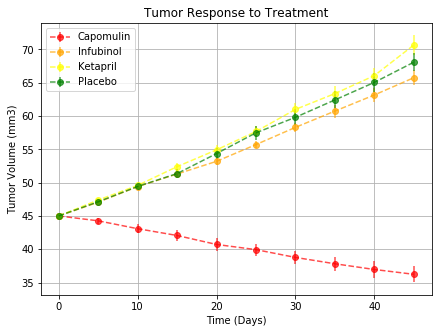

In [6]:
# Generate the Plot (with Error Bars)


# Save the Figure
# Setting up the plot

# mean_volume["Placebo"] 
# SE_volume["Placebo"]
x_axis=np.arange(0,46,5)
fig, ax = plt.subplots(figsize=(7, 5))

ax.errorbar(x_axis, mean_volume["Capomulin"] , SE_volume["Capomulin"], fmt="--o",color="red",alpha=0.7,label="Capomulin")                   
ax.errorbar(x_axis, mean_volume["Infubinol"] , SE_volume["Infubinol"], fmt="--o",color="orange",alpha=0.7,label="Infubinol")                   
ax.errorbar(x_axis, mean_volume["Ketapril"] , SE_volume["Ketapril"], fmt="--o",color="yellow",alpha=0.7,label="Ketapril")                   
ax.errorbar(x_axis, mean_volume["Placebo"] , SE_volume["Placebo"], fmt="--o",color="green",alpha=0.7,label="Placebo")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.legend(loc="upper left", fontsize="medium", fancybox=True)
plt.grid()
plt.show()




## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic=combined_data.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
del mean_metastatic["Tumor Volume (mm3)"]
# Preview DataFrame
mean_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_metastatic=combined_data.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
del SE_metastatic["Mouse ID"]
del SE_metastatic["Tumor Volume (mm3)"]
# Preview DataFrame
SE_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
SE_spread=SE_metastatic.squeeze().unstack(level=0)

In [10]:

mean_spread=mean_metastatic.squeeze().unstack(level=0)

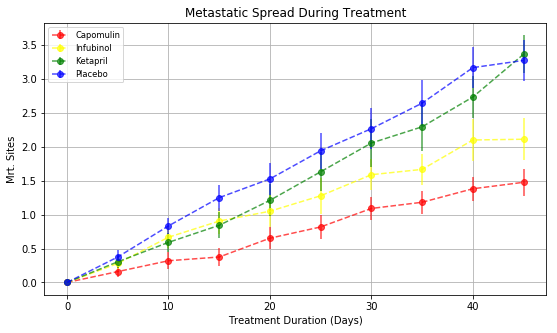

In [11]:
# plt.figure()
# plt.errorbar("Timepoint", "Drug", yerr=Standard erro)
# plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")
# mean_volume["Placebo"] 
# SE_volume["Placebo"]
x_axis=np.arange(0,46,5)
fig, ax = plt.subplots(figsize=(9, 5))

ax.errorbar(x_axis, mean_spread["Capomulin"] , SE_spread["Capomulin"], fmt="--o",color="red",alpha=0.7,label="Capomulin")                   
ax.errorbar(x_axis, mean_spread["Infubinol"] , SE_spread["Infubinol"], fmt="--o",color="yellow",alpha=0.7,label="Infubinol")                   
ax.errorbar(x_axis, mean_spread["Ketapril"] , SE_spread["Ketapril"], fmt="--o",color="green",alpha=0.7,label="Ketapril")                   
ax.errorbar(x_axis, mean_spread["Placebo"] , SE_spread["Placebo"], fmt="--o",color="blue",alpha=0.7,label="Placebo")

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Mrt. Sites")
ax.set_title("Metastatic Spread During Treatment")
plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.grid()
plt.show()




## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_data=combined_data.groupby(["Drug","Timepoint"]).count()
# Convert to DataFramedel
del mice_data['Tumor Volume (mm3)']
del mice_data["Metastatic Sites"]
# Preview DataFrame
mice_data.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [13]:
mice_df=mice_data.squeeze().unstack(level=0)
mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


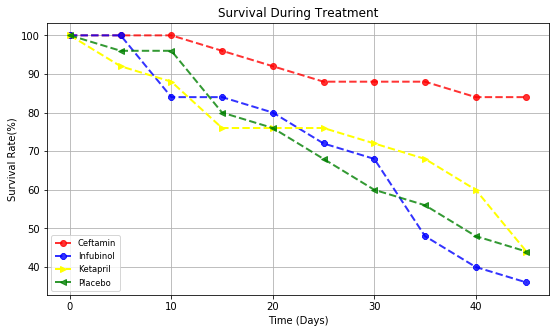

In [14]:
# calculate survival rate of 4 drugs
ca=mice_df["Capomulin"]
ca_sr0=100*(ca[0])/ca[0]
ca_sr5=100*(ca[5])/ca[0]
ca_sr10=100*(ca[10])/ca[0]
ca_sr15=100*(ca[15])/ca[0]
ca_sr20=100*(ca[20])/ca[0]
ca_sr25=100*(ca[25])/ca[0]
ca_sr30=100*(ca[30])/ca[0]
ca_sr35=100*(ca[35])/ca[0]
ca_sr40=100*(ca[40])/ca[0]
ca_sr45=100*(ca[45])/ca[0]
ca_survival_rate=[ca_sr0,ca_sr5,ca_sr10,ca_sr15,ca_sr20,ca_sr25,ca_sr30,ca_sr35,ca_sr40,ca_sr45]
ca_survival_rate
In=mice_df["Infubinol"]
In_sr0=100*(In[0])/In[0]
In_sr5=100*(In[5])/ca[0]
In_sr10=100*(In[10])/In[0]
In_sr15=100*(In[15])/In[0]
In_sr20=100*(In[20])/In[0]
In_sr25=100*(In[25])/In[0]
In_sr30=100*(In[30])/In[0]
In_sr35=100*(In[35])/In[0]
In_sr40=100*(In[40])/In[0]
In_sr45=100*(In[45])/In[0]
In_survival_rate=[In_sr0,In_sr5,In_sr10,In_sr15,In_sr20,In_sr25,In_sr30,In_sr35,In_sr40,In_sr45]
In_survival_rate
ke=mice_df["Ketapril"]
ke_sr0=100*(ke[0])/ke[0]
ke_sr5=100*(ke[5])/ke[0]
ke_sr10=100*(ke[10])/ke[0]
ke_sr15=100*(ke[15])/ke[0]
ke_sr20=100*(ke[20])/ke[0]
ke_sr25=100*(ke[25])/ke[0]
ke_sr30=100*(ke[30])/ke[0]
ke_sr35=100*(ke[35])/ke[0]
ke_sr40=100*(ke[40])/ke[0]
ke_sr45=100*(ke[45])/ke[0]
ke_survival_rate=[ke_sr0,ke_sr5,ke_sr10,ke_sr15,ke_sr20,ke_sr25,ke_sr30,ke_sr35,ke_sr40,ke_sr45]
ke_survival_rate
pb=mice_df["Placebo"]
pb_sr0=100*(pb[0])/pb[0]
pb_sr5=100*(pb[5])/pb[0]
pb_sr10=100*(pb[10])/pb[0]
pb_sr15=100*(pb[15])/pb[0]
pb_sr20=100*(pb[20])/pb[0]
pb_sr25=100*(pb[25])/pb[0]
pb_sr30=100*(pb[30])/pb[0]
pb_sr35=100*(pb[35])/pb[0]
pb_sr40=100*(pb[40])/pb[0]
pb_sr45=100*(pb[45])/pb[0]
pb_survival_rate=[pb_sr0,pb_sr5,pb_sr10,pb_sr15,pb_sr20,pb_sr25,pb_sr30,pb_sr35,pb_sr40,pb_sr45]
pb_survival_rate
x_axis=np.arange(0,46,5)
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(x_axis,ca_survival_rate,marker="o",color="red",alpha=0.8,label="Ceftamin",linestyle='--',linewidth=2)

plt.plot(x_axis,In_survival_rate,marker="8",color="blue",alpha=0.8,label="Infubinol",linestyle='--',linewidth=2)
plt.plot(x_axis,ke_survival_rate,marker=">",color="yellow",alpha=1,label="Ketapril",linestyle='--',linewidth=2)
plt.plot(x_axis,pb_survival_rate,marker="<",color="green",alpha=0.8,label="Placebo",linestyle='--',linewidth=2)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate(%)")
ax.set_title("Survival During Treatment")
plt.legend(loc="lower left", fontsize="small", fancybox=True)
plt.grid()
plt.show()



## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
mean_Volume=mean_data.squeeze().unstack(level=-1)
volume_change_over_45days=100*(mean_Volume[45]-mean_Volume[0])/mean_Volume[0]
volume_change_over_45days
# Display the data to confirm



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [16]:
analysis_target=[volume_change_over_45days['Capomulin'],
                 volume_change_over_45days['Infubinol'],
                 volume_change_over_45days['Ketapril'],
                 volume_change_over_45days['Placebo']]
analysis_target

[-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153]

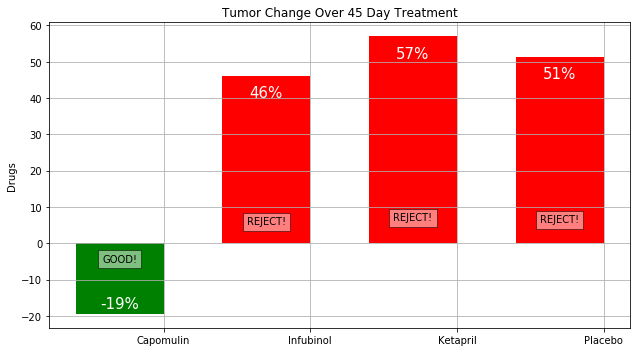

In [24]:
drugs=['Capomulin','Infubinol','Ketapril','Placebo']
ind=np.arange(len(drugs))
fig, ax = plt.subplots(figsize=(9, 5))
width=0.6
my_colors=['g','r','r','r']
my_try=ax.bar(ind, analysis_target, width, color=my_colors)

ax.set_ylabel('Drugs')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(drugs)
plt.grid()

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

       
        if height > 0: 
            ax.text(rect.get_x() + rect.get_width()/2., height*0.1,
               "REJECT!",
                ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height*0.3,
                "GOOD!",
                ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.3: 
            label_position = height - (y_height * 0.08)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                f"{int(height)}%",
                ha='center', va='bottom',color="white",size=15)

autolabel(my_try, ax)
fig.show()
plt.tight_layout()


TypeError: 'AxesSubplot' object does not support indexing

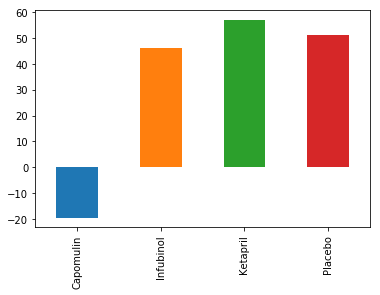

In [20]:
# try
drugs=['Capomulin','Infubinol','Ketapril','Placebo']
s=pd.Series(analysis_target,index=['Capomulin','Infubinol','Ketapril','Placebo'  ])
my_colors=['g','r','r','r']
rect=s.plot(kind="bar")
rect[0].set_color

plt.grid()
plt.show()





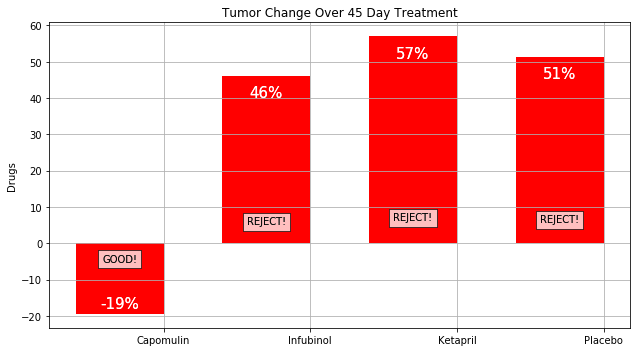

In [23]:
# try


ind=np.arange(len(drugs))
fig, ax = plt.subplots(figsize=(9, 5))
width=0.6
# my_colors=['g','r','r','r']

# my_try=ax.bar(ind, analysis_target, width, color=my_colors)


for drug in analysis_target:
    if drug>0:
        my_try1=ax.bar(ind, analysis_target, width, color="red")
    else:
        my_try2=ax.bar(ind, analysis_target, width, color="green")
        
ax.set_ylabel('Drugs')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(drugs)
plt.grid()

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

       
        if height > 0: 
            ax.text(rect.get_x() + rect.get_width()/2., height*0.1,
               "REJECT!",
                ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height*0.3,
                "GOOD!",
                ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.3: 
            label_position = height - (y_height * 0.08)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                f"{int(height)}%",
                ha='center', va='bottom',color="white",size=15)

autolabel(my_try1, ax)
autolabel(my_try2, ax)

fig.show()
plt.tight_layout()
